## Libraries comparison analysis

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline

In [6]:
benchmark_pandas = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_pandas.csv'
benchmark_polars_eager = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_polars_eager.csv'
benchmark_polars_lazy = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_polars_lazy.csv'

Load benchmark files and combine them into a single file

In [7]:
# Load individual benchmark CSVs
pandas_df = pd.read_csv(benchmark_pandas)
polars_eager_df = pd.read_csv(benchmark_polars_eager)
polars_lazy_df = pd.read_csv(benchmark_polars_lazy)

# Combine into one DataFrame
benchmark_df = pd.concat([pandas_df, polars_eager_df, polars_lazy_df], ignore_index=True)
benchmark_df["Step"] = benchmark_df["Step"].str.strip()  # normalize step names

benchmark_df = benchmark_df.reset_index()
benchmark_df.head()

,index,Library,Step,Time (s),Peak Memory (MB),Total Object Memory (MB)
0,0,Pandas,Load CSV,177.7493,6036.6153,8896.1713
1,1,Pandas,Describe numeric columns,4.0421,366.7301,0.0007
2,2,Pandas,Merchant type value counts,0.7242,14.9687,0.0012
3,3,Pandas,Missing values per column,17.3509,538.8379,0.0025
4,4,Pandas,Min txn_date,0.0590,67.4205,NaN


Prepare comparison table

In [8]:
# Pivot for step-by-step comparison (now including Total Object Memory)
pivot_df = benchmark_df.pivot(
    index="Step",
    columns="Library",
    values=["Time (s)", "Peak Memory (MB)", "Total Object Memory (MB)"]
)

# Flatten MultiIndex columns
pivot_df.columns = ["_".join(col).strip() for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

# Compute Eager % improvements (vs Pandas)
pivot_df["Time Improvement Eager vs Pandas (%)"] = 100 * (
    pivot_df["Time (s)_Pandas"] - pivot_df["Time (s)_Polars Eager"]
) / pivot_df["Time (s)_Pandas"]

pivot_df["Peak Memory Improvement Eager vs Pandas (%)"] = 100 * (
    pivot_df["Peak Memory (MB)_Pandas"] - pivot_df["Peak Memory (MB)_Polars Eager"]
) / pivot_df["Peak Memory (MB)_Pandas"]

pivot_df["Total Object Memory Improvement Eager vs Pandas (%)"] = 100 * (
    pivot_df["Total Object Memory (MB)_Pandas"] - pivot_df["Total Object Memory (MB)_Polars Eager"]
) / pivot_df["Total Object Memory (MB)_Pandas"]

# Compute Lazy % improvements (vs Pandas)
pivot_df["Time Improvement Lazy vs Pandas (%)"] = 100 * (
    pivot_df["Time (s)_Pandas"] - pivot_df["Time (s)_Polars Lazy"]
) / pivot_df["Time (s)_Pandas"]

pivot_df["Peak Memory Improvement Lazy vs Pandas (%)"] = 100 * (
    pivot_df["Peak Memory (MB)_Pandas"] - pivot_df["Peak Memory (MB)_Polars Lazy"]
) / pivot_df["Peak Memory (MB)_Pandas"]

pivot_df["Total Object Memory Improvement Lazy vs Pandas (%)"] = 100 * (
    pivot_df["Total Object Memory (MB)_Pandas"] - pivot_df["Total Object Memory (MB)_Polars Lazy"]
) / pivot_df["Total Object Memory (MB)_Pandas"]

pivot_df.head(15)


,Step,Time (s)_Pandas,Time (s)_Polars Eager,Time (s)_Polars Lazy,Peak Memory (MB)_Pandas,Peak Memory (MB)_Polars Eager,Peak Memory (MB)_Polars Lazy,Total Object Memory (MB)_Pandas,Total Object Memory (MB)_Polars Eager,Total Object Memory (MB)_Polars Lazy,Time Improvement Eager vs Pandas (%),Peak Memory Improvement Eager vs Pandas (%),Total Object Memory Improvement Eager vs Pandas (%),Time Improvement Lazy vs Pandas (%),Peak Memory Improvement Lazy vs Pandas (%),Total Object Memory Improvement Lazy vs Pandas (%)
0,Avg/Total txn by merch type,0.4273,0.3751,0.1389,119.7477,0.0038,0.0031,0.0014,0.0004,0.0004,12.216242,99.996827,7.142857e+01,67.493564,99.997411,71.428571
1,Daily transaction count,0.3227,8.0665,0.0453,187.1017,0.0068,0.0046,0.0005,89.8050,0.0004,-2399.690115,99.996366,-1.796090e+07,85.962194,99.997541,20.000000
2,Describe numeric columns,4.0421,1.5909,1.4702,366.7301,0.2901,0.2874,0.0007,0.0015,0.0015,60.641746,99.920896,-1.142857e+02,63.627817,99.921632,-114.285714
3,Fraud amount stats,3.4342,0.2868,0.6633,336.4072,0.0139,0.0142,0.0005,0.0001,0.0001,91.648710,99.995868,8.000000e+01,80.685458,99.995779,80.000000
4,Fraud rate by merchant_type,0.5277,0.1502,0.0513,179.6154,0.0029,0.0023,0.0012,0.0003,0.0003,71.536858,99.998385,7.500000e+01,90.278567,99.998719,75.000000
5,Fraud vs Non-Fraud Count,0.0459,0.1122,0.0187,67.3579,0.0023,0.0027,0.0001,0.0000,0.0000,-144.444444,99.996585,1.000000e+02,59.259259,99.995992,100.000000
6,Load CSV,177.7493,10.7785,10.7296,6036.6153,0.5692,0.5690,8896.1713,2471.3581,2471.3581,93.936122,99.990571,7.221998e+01,93.963633,99.990574,72.219981
7,Max txn_date,0.0262,0.0037,0.0023,14.9684,0.0020,0.0017,NaN,0.0000,0.0000,85.877863,99.986639,NaN,91.221374,99.988643,NaN
8,Merchant type value counts,0.7242,0.4424,0.3087,14.9687,0.0121,0.0119,0.0012,0.0002,0.0002,38.911903,99.919165,8.333333e+01,57.373654,99.920501,83.333333
9,Min txn_date,0.0590,0.0236,0.0216,67.4205,0.0020,0.0017,NaN,0.0000,0.0000,60.000000,99.997034,NaN,63.389831,99.997479,NaN


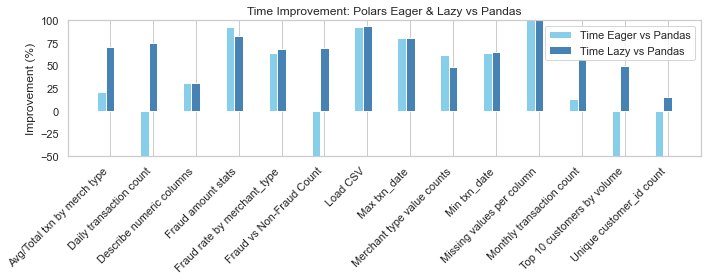

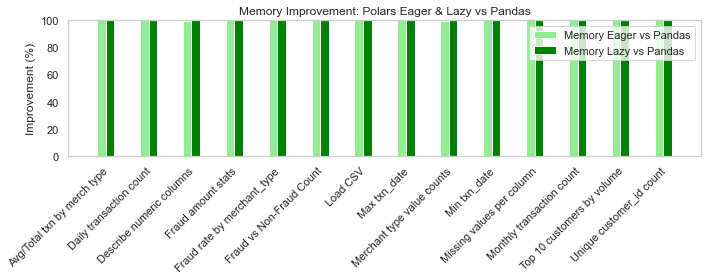

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare plot data
steps = pivot_df["Step"]
x = np.arange(len(steps))  # X positions

bar_width = 0.2

# Extract data
eager_time = pivot_df["Time Improvement Eager vs Pandas (%)"]
lazy_time = pivot_df["Time Improvement Lazy vs Pandas (%)"]
eager_memory = pivot_df["Memory Improvement Eager vs Pandas (%)"]
lazy_memory = pivot_df["Memory Improvement Lazy vs Pandas (%)"]

# Plot Time Improvements
plt.figure(figsize=(10, 4))
plt.bar(x - bar_width, eager_time, width=bar_width, label="Time Eager vs Pandas", color="skyblue")
plt.bar(x, lazy_time, width=bar_width, label="Time Lazy vs Pandas", color="steelblue")
plt.xticks(x, steps, rotation=45, ha='right')
plt.ylim(-50, 100)
plt.ylabel("Improvement (%)")
plt.title("Time Improvement: Polars Eager & Lazy vs Pandas")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

# Plot Memory Improvements
plt.figure(figsize=(10, 4))
plt.bar(x - bar_width, eager_memory, width=bar_width, label="Memory Eager vs Pandas", color="lightgreen")
plt.bar(x, lazy_memory, width=bar_width, label="Memory Lazy vs Pandas", color="green")
plt.xticks(x, steps, rotation=45, ha='right')
plt.ylim(0, 100)
plt.ylabel("Improvement (%)")
plt.title("Memory Improvement: Polars Eager & Lazy vs Pandas")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

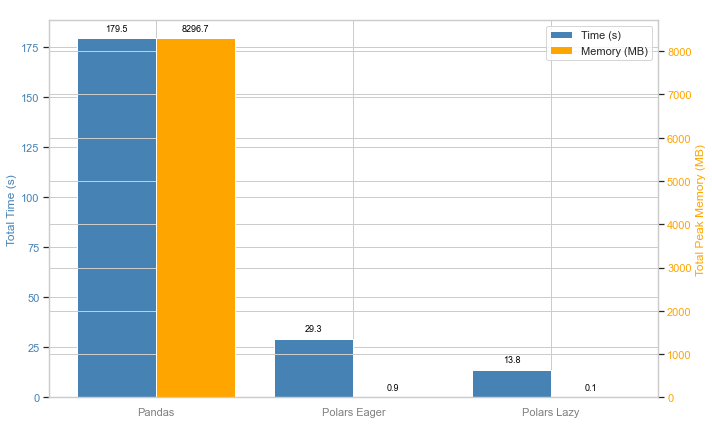

In [ ]:
summary = benchmark_df.groupby("Library")[["Time (s)", "Peak Memory (MB)"]].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(summary))
bar_width = 0.4

# Plot Time bars (left y-axis)
color_time = "steelblue"
time_bars = ax1.bar(x - bar_width/2, summary["Time (s)"], width=bar_width, label="Time (s)", color=color_time)
ax1.set_ylabel("Total Time (s)", color=color_time)
ax1.tick_params(axis="y", labelcolor=color_time)
ax1.set_xticks(x)
ax1.set_xticklabels(summary["Library"], color="gray")  # ← X labels white
ax1.set_title("Total Time and Memory Usage per Library", color="white")


# Plot Memory bars (right y-axis)
ax2 = ax1.twinx()
color_mem = "orange"
mem_bars = ax2.bar(x + bar_width/2, summary["Peak Memory (MB)"], width=bar_width, label="Memory (MB)", color=color_mem)
ax2.set_ylabel("Total Peak Memory (MB)", color=color_mem)
ax2.tick_params(axis="y", labelcolor=color_mem)

# Annotate time bars
for bar in time_bars:
    height = bar.get_height()
    ax1.annotate(f"{height:.1f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color="black")

# Annotate memory bars
for bar in mem_bars:
    height = bar.get_height()
    ax2.annotate(f"{height:.1f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color="black")

# Legend and layout
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()